# Lab 02

### Grad. Communications Lab :: ECEN 4652

##### Maurice Woods

##### 3 February 2017
--------------------------

### E01 - "showft"  to  Approximate  FT

#### Part A.)

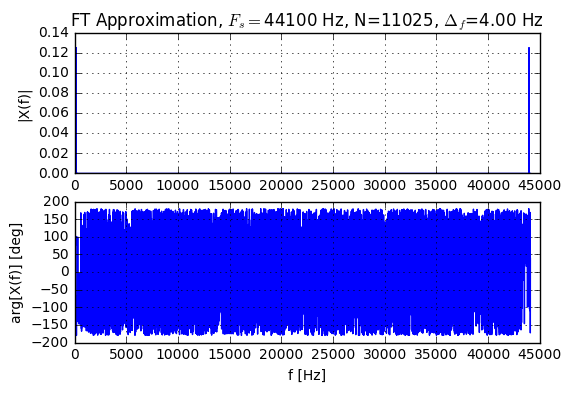

In [1]:
from pylab import *
import ecen4652 as ecen
import showfun                 # Note: May have to change directory
# to point to showfun.py
Fs = 44100                     # Sampling rate
fa, fb = 140, 164              # Frequencies fa, fb
tlen = 0.25                    # Length of t-axis in sec
tt = arange(0,round(Fs*tlen))/float(Fs)  # Time axis
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
# Linear combination of sinusoids
sig_xt = ecen.sigWave(xt, Fs, 0)  # Waveform from class sigWave
showfun.showft(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

As stated, this is not very useful...it's too condensed. We need to change showft() to accept a window in which to display a certain range of data points.

Changes made to showft():
- The ff_lim = [f1,f2,llim] parameter set now controls the horizontal display of the FT
 - Method: TODO
- The ff_lim = [f1,f2,llim] parameter set now control the vertical display of the FT
 - Method: TODO

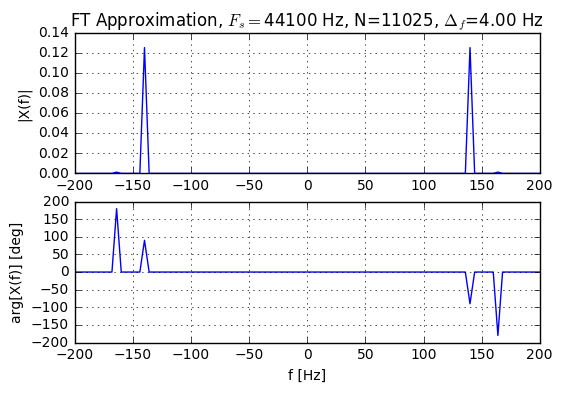

In [2]:
import importlib
importlib.reload(showfun)            # Reload showfun after changes
showfun.showft_plus(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

Question:

> The sine at f_a = 140Hz in x has amplitude 1, but the "spikes" of |X(f)| at f = +/-f_a have only amplitude 0.125. Is that right?

> Hint: For CT impulse functions del(.) the area underneath the impulse determines the size" of the impulse.

Answer:

> TODO

##### Part B.)

As stated, and confirmed below, sine waves that differ too greatly in amplitude could not be visible on our plots...

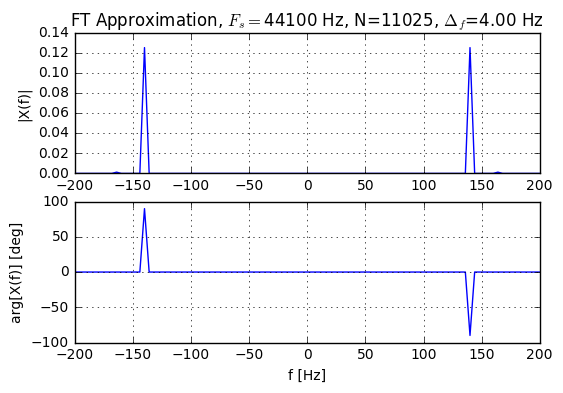

In [3]:
xt2 = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)
sig_xt2 = ecen.sigWave(xt2, Fs, 0)
showfun.showft_plus(sig_xt2,[-200, 200, 1e-3])

Additional changes made to showft():
- When llim<0 in ff_lim = [f1,f2,llim], the vertical display of the FT is converted to dB
    - Method: TODO

Now, let's check our fix:

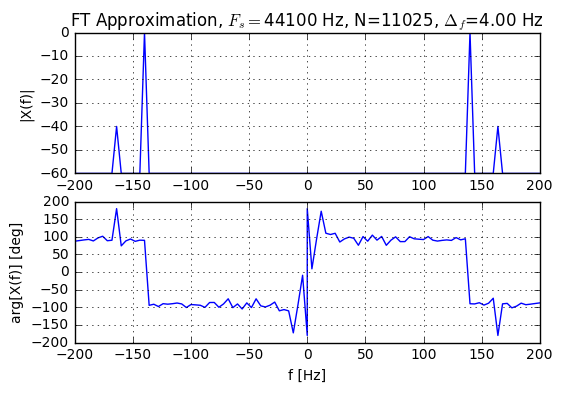

In [4]:
importlib.reload(showfun)       # Reload showfun after modifications
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
sig_xt = ecen.sigWave(xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-200, 200, -60]) # Display X(f) in dB, using ff_lim

##### Part C.)

"Maurice" = 


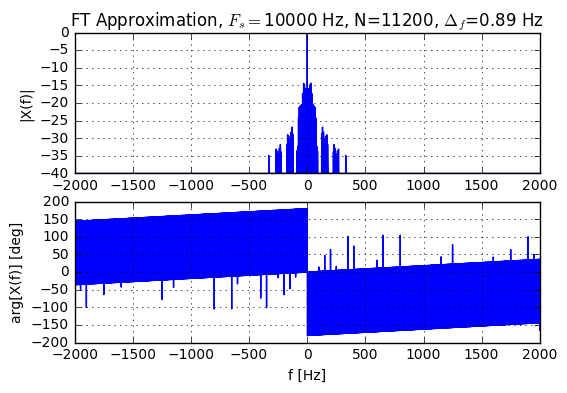

In [5]:
import os
os.chdir("../Lab01")
from ftpam01 import ascii2ftpam
os.chdir("../Lab02")

Tb=1.0/100.0

[sig_xt,tt,Fs]=ascii2ftpam("Maurice",8,"",10000,1/Tb)
# Mirror the FTPAM string about t=0s
sig_xt = concatenate([sig_xt[::-1],sig_xt])

sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-2000, 2000, -40]) 

---------
### E02 -  General PAM Transmitter

##### Part A.)

In [6]:
from pamfun import *
from pylab import *
pwt = pt*kaiser(len(pt),beta)    # Pulse p(t), Kaiser windowed

##### Part B.)

In [ ]:
dn = random(FB/2)              # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)    # Random unipolar binary sequence in {0,1}
an = 2*dn-1                    # Random polar binary sequence in {-1,+1}